# Лабораторная работа №3
# по численным методам
## Выполнила: Хренникова Ангелина 
## Группа: М8О-308Б-19
### Вариант: 20

Задание: Используя таблицу значений Yi функции y=f(x), вычисленных в точках Xi, i=0,...,3 построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки {Xi, Yi}.  Вычислить значение погрешности интерполяции в точке X*.

In [1]:
from sys import stdin
from copy import deepcopy

import numpy as np
import copy
import cmath
import math
import matplotlib.pyplot as plt

In [2]:
class Matrix:
    
    #Инициализация матрицы
    def __init__(self, matrix):
        self.matrix = deepcopy(matrix)
        self.size = self._Size()
        
    #Печать    
    def __str__(self):
        return '\n'.join([''.join(['%f\t' % i for i in row]) for
                          row in self.matrix])
    
    #Доступ к элементу
    def __getitem__(self, index):
        return self.matrix[index]
    
    #Размер матрицы
    def _Size(self):
        rows = len(self.matrix)
        cols = 0
        for row in self.matrix:
            if (type(row) == int) | (type(row) == float):
                break
            if len(row) > cols:
                cols = len(row)
        return (rows, cols)
    
    #ЛУП разложение с выбором максимального элемента
    def Get_LUP(self):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
            
        n = self.size[0]
        P = [i for i in range(n)]
        mat = np.zeros((n, n), float)
        LU = Matrix(mat)
        
        for i in range(n):
            for j in range(n):
                LU.matrix[i][j] = self.matrix[i][j]
      
        for k in range(n):
            main_elem = 0
            for i in range(k, n):
                if (abs(self[i][k]) > main_elem):
                    main_elem = abs(self[i][k])
                    row = i
            if (main_elem == 0):
                raise Exception('Столбец нулевой')
                
            P[k], P[row] = P[row], P[k]

            for i in range(n):
                LU.matrix[k][i], LU.matrix[row][i] = LU.matrix[row][i], LU.matrix[k][i]
            for i in range(k + 1, n):
                LU.matrix[i][k] /= LU.matrix[k][k]
                for j in range(k + 1, n):
                    LU.matrix[i][j] -= LU.matrix[i][k] * LU.matrix[k][j]
      
        return LU, P, main_elem
    
    #ЛУ разложение
    def Get_LU(self):
        if self.size[0] != self.size[1]:
            raise Exception("Матрица должна быть квадратной")
            
        n = self.size[0]
        
        mat = np.zeros((n, n), float)
        U = Matrix(mat)
        L = Matrix(mat)
        LU, P, p = self.Get_LUP()
        
        for i in range(n):
            L.matrix[i][i] = 1
            for j in range(n):
                if (j < i):
                    L.matrix[i][j] = LU.matrix[i][j]
                else:
                    U.matrix[i][j] = LU.matrix[i][j]
                    
        return L, U    

In [3]:
def get_solution(A, b):
    L, U = A.Get_LU()
    LU, P, p = A.Get_LUP()

    n = A.size[0]
    x = [0] * n
    y = [0] * n

    #Ly = b
    for i in range(n):
        sum = 0
        for j in range(i):
            sum += L.matrix[i][j] * y[j]
 
        y[i] = b[P[i]] - sum

    #Ux = y
    for i in range(n - 1, -1, -1):
        sum = 0
        for j in range(i + 1, n):
            sum += U.matrix[i][j] * x[j]
 
        x[i] = (y[i] - sum) / U.matrix[i][i]
      
    return x

In [4]:
def f(x):
    return math.acos(x)+x

In [5]:
X_a = np.array([-0.4, -0.1, 0.2, 0.5])
X_b = np.array([-0.4, 0, 0.2, 0.5])
X = 0.1

In [6]:
def omega(x, X):
    w = 1
    for i in range(len(X)):
        w *= (x - X[i])
    return w

def omega_(x, X):
    w = 1
    for i in range(len(X)):
        if X[i] != x:
            w *= (x - X[i])
    return w

def L(x, X):
    l = 0
    for i in range(len(X)):
        l += (f(X[i]) * omega(x, X)) / ((x - X[i]) * omega_(X[i], X))
    return l

In [7]:
def X_new(i, k, X):
    return [X[j] for j in range(i, k)]

def separate(X):
    if len(X) == 2:
        return (f(X[0]) - f(X[1])) / (X[0] - X[1])
    else:
        return (separate(X_new(0, len(X) - 1, X)) - separate(X_new(1, len(X), X))) / (X[0] - X[len(X) - 1])

In [8]:
def xxx(x, i, X):
    res = 1
    for j in range(i):
        res *= (x - X[j])
    return res
    
def P(x, X):
    p = f(X[0])
    for i in range(1, len(X)):
        X_ = X_new(0, i + 1, X)
        p += xxx(x, i, X) * separate(X_)
    return p

In [9]:
print("МНОГОЧЛЕН ЛАГРАНЖА\n")
print("а)\tf(x*) = {0}\n\tL(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), L(X, X_a), f(X) - L(X, X_a)))
print("б)\tf(x*) = {0}\n\tL(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), L(X, X_b), f(X) - L(X, X_b)))

МНОГОЧЛЕН ЛАГРАНЖА

а)	f(x*) = 1.570628905633337
	L(x*) = 1.570740448784384
	Погрешность: -0.00011154315104699997

б)	f(x*) = 1.570628905633337
	L(x*) = 1.5707026801545112
	Погрешность: -7.377452117429684e-05



In [10]:
print("МНОГОЧЛЕН НЬЮТОНА\n")
print("а)\tf(x*) = {0}\n\tP(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), P(X, X_a), f(X) - P(X, X_a)))
print("б)\tf(x*) = {0}\n\tP(x*) = {1}\n\tПогрешность: {2}\n".format(f(X), P(X, X_b), f(X) - P(X, X_b)))

МНОГОЧЛЕН НЬЮТОНА

а)	f(x*) = 1.570628905633337
	P(x*) = 1.5707404487843843
	Погрешность: -0.00011154315104744406

б)	f(x*) = 1.570628905633337
	P(x*) = 1.570702680154511
	Погрешность: -7.377452117407479e-05



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


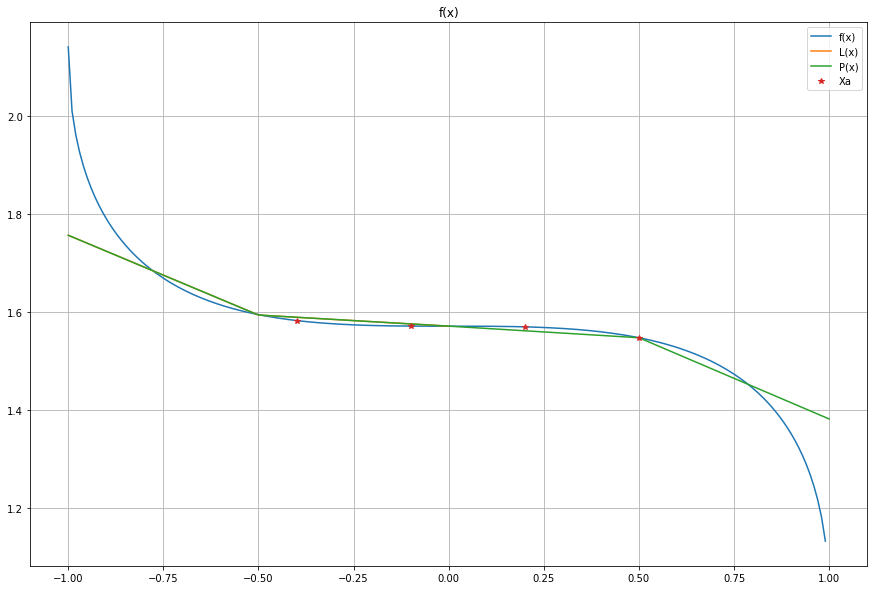

In [11]:
xmin = -1
xmax = 1
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [f(x) for x in xarr]

y_X_a = [f(x) for x in X_a]

Larr = np.array([-1, -0.5, 0, 0.5, 1])
Llist = [L(x, X_a) for x in Larr]

Parr = np.array([-1, -0.5, 0, 0.5, 1])
Plist = [P(x, X_a) for x in Parr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f(x)')
plt.plot(xarr, ylist)
plt.plot(Larr, Llist)
plt.plot(Parr, Plist)
plt.plot(X_a, y_X_a, '*')
plt.legend(['f(x)', 'L(x)', 'P(x)', 'Xa'])
plt.show()

Задание: Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при x=x0 и x=x4. Вычислить значение функции в точке x=X*.

In [12]:
x=0.1

In [13]:
X = np.array([-0.4, -0.1, 0.2, 0.5, 0.8])
F = np.array([1.5823, 1.5701, 1.5694, 1.5472, 1.4435])

In [14]:
def Progonka(A, b):
    if (A.size[0] != A.size[1]) | (A.size[0] != len(b)):
        raise Exception("Система имеет бесконечное число решений")   
    X = [0] * A.size[0]
    P = [0] * A.size[0]
    Q = [0] * A.size[0]
    P[0] = -A.matrix[0][1] / A.matrix[0][0]
    Q[0] = b[0] / A.matrix[0][0]
    for i in range(1, A.size[0]):
        if i != A.size[0] - 1:
            P[i] = -A.matrix[i][i + 1] / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
        else:
            P[i] = 0
        Q[i] = (b[i] - Q[i - 1] * A.matrix[i][i - 1]) / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
    for i in range(A.size[0] - 1, -1, -1):
        if i != A.size[0] - 1:
            X[i] = X[i + 1] * P[i] + Q[i]
        else:
            X[i] = Q[i]
    return X

In [15]:
def S(x, X, F):
    res = 0
    if len(X) != len(F):
        raise Exception("Несовпадение размерностей")
        
    h = []
    n = len(X)
    
    for i in range(1, n):
        h.append(X[i] - X[i - 1])
        
    c_syst = []
    rows = []
    
    for i in range(n - 2):
        if i == 0:
            rows.append(2 * (h[i] + h[i + 1]))
        elif i == 1:
            rows.append(h[i])
        else:
            rows.append(0)
            
    c_syst.append(rows)
        
    for i in range(1, n - 3):
        rows = []
        for j in range(n - 2):
            if i - 1 == j:
                rows.append(h[i])
            elif i == j:
                rows.append(2 * (h[i - 1] + h[i]))
            elif i + 1 == j:
                rows.append(h[i])
            else:
                rows.append(0)
        c_syst.append(rows)
    
    rows = []
    
    for i in range(2, n):
        if i == n - 2:
            rows.append(h[i])
        elif i == n - 1:
            rows.append(2 * (h[i - 2] + h[i - 1]))
        else:
            rows.append(0)
            
    c_syst.append(rows)        
    b = []    
    
    for i in range(2, n):
        b.append(3 * ((F[i] - F[i - 1]) / h[i - 1] - (F[i - 1] - F[i - 2]) / h[i - 2]))
    
    c = [0] + Progonka(Matrix(c_syst), b)
    
    a = []
    b = []
    d = []
    
    for i in range(n - 1):
        a.append(F[i])
        if i == n - 2:
            b.append((F[i + 1] - F[i]) / h[i] - (2 / 3) * h[i] * c[i])
            d.append(- c[i] / (3 * h[i]))
        else:
            b.append((F[i + 1] - F[i]) / h[i] - (1 / 3) * h[i] * (c[i + 1] + 2 * c[i]))
            d.append((c[i + 1] - c[i]) / (3 * h[i]))
    
    for i in range(n - 1):
        if (x >= X[i]) & (x <= X[i + 1]):
            res = a[i] + b[i] * (x - X[i]) + c[i] * (x - X[i]) ** 2 + d[i] * (x - X[i]) ** 3
            break
    return res

In [16]:
print('f(x*) = {}'.format(S(x, X, F)))

f(x*) = 1.5691201058201059


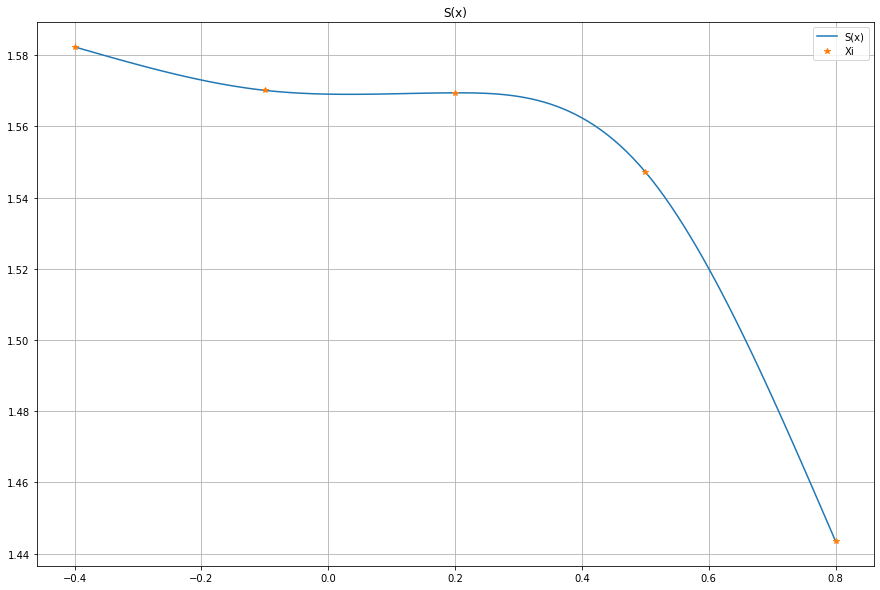

In [17]:
xmin = -0.4
xmax = 0.81
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [S(x_, X, F) for x_ in xarr]
ylist.remove(0)
ylist.append(1.4435)

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('S(x)')
plt.plot(xarr, ylist)
plt.plot(X, F, '*')
plt.legend(['S(x)', 'Xi'])
plt.show()

Задание: Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены a) 1-ой  и б) 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.

In [18]:
X = np.array([-0.7, -0.4, -0.1, 0.2, 0.5, 0.8])
Y = np.array([1.6462, 1.5823, 1.571, 1.5694, 1.5472, 1.4435])

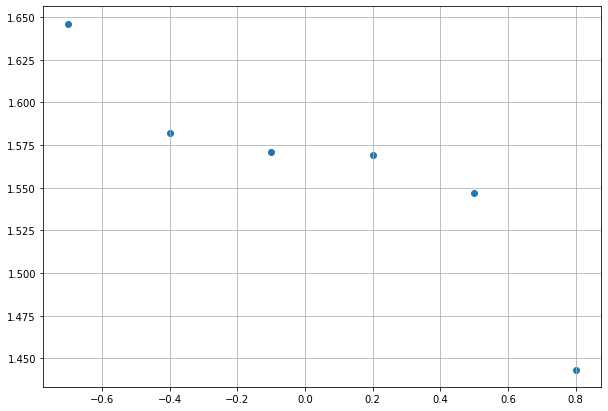

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y)
plt.grid()
plt.show()

In [20]:
def MNK(X, Y, n):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    A = []
    b = []
    
    for i in range(n + 1):
        rows = []
        for j in range(n + 1):
            rows.append(sum([x ** (i + j) for x in X]))
        A.append(rows)
        b.append(sum([Y[k] * X[k] ** i for k in range(len(Y))]))
    
    a = get_solution(Matrix(A), b)
    return lambda x: sum([a[i] * x ** i for i in range(n + 1)])

In [21]:
def err(f, X, Y):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    return sum([(f(X[i]) - Y[i]) ** 2 for i in range(len(X))])

In [22]:
f_1 = MNK(X, Y, 1)
f_2 = MNK(X, Y, 2)

In [23]:
xmin = -0.7
xmax = 0.81
dx = 0.01

xarr = np.arange(xmin, xmax, dx)

Standard deviation of f_1(x) is 0.003940351047619036


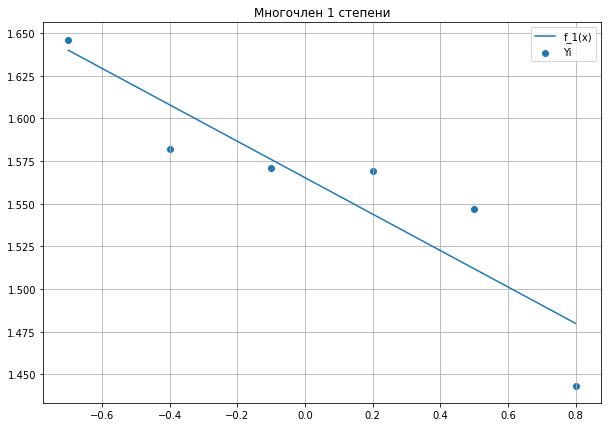

In [24]:
print("Standard deviation of f_1(x) is {}".format(err(f_1, X, Y)))

ylist = [f_1(x) for x in xarr]

plt.figure(figsize=(10,7))
plt.title("Многочлен 1 степени")
plt.grid()
plt.scatter(X, Y)
plt.plot(xarr, ylist)
plt.legend(['f_1(x)', 'Yi'])
plt.show()

Standard deviation of f_2(x) is 0.0032396991428571523


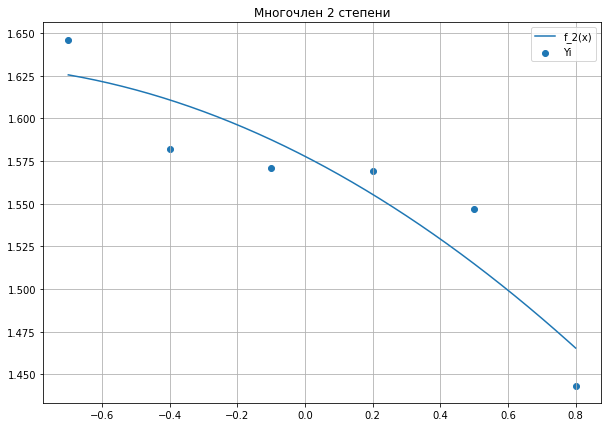

In [25]:
print("Standard deviation of f_2(x) is {}".format(err(f_2, X, Y)))

ylist = [f_2(x) for x in xarr]

plt.figure(figsize=(10,7))
plt.title("Многочлен 2 степени")
plt.grid()
plt.scatter(X, Y)
plt.plot(xarr, ylist)
plt.legend(['f_2(x)', 'Yi'])
plt.show()

Задание: Вычислить первую и вторую производную от таблично заданной функции yi=f(xi), i=0, 1, 2, 3, 4 в точке x=X*.  

In [26]:
x=1.0

In [27]:
X = np.array([-1., 0., 1., 2., 3.])
Y = np.array([1.3562, 1.5708, 1.7854, 2.4636, 3.3218])

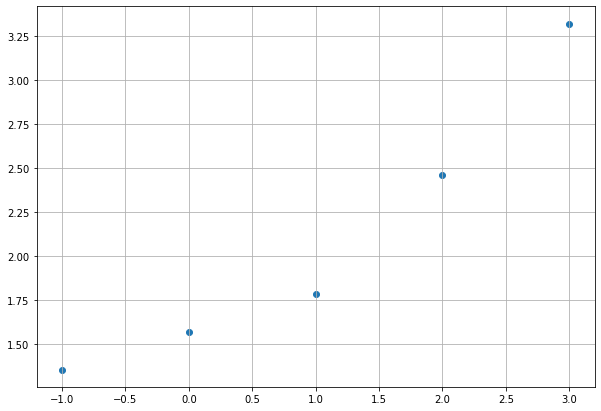

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(X, Y)
plt.grid()
plt.show()

In [29]:
def diff(x, X, Y):
    if len(X) != len(Y):
        raise Exception("Несоответсвие размерностей")
    
    for i in range(len(X) - 1):
        if (x >= X[i]) & (x <= X[i + 1]):
            if (x == X[i]) & (i != 0):
                left = (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
                right = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                
                mean = (left + right) / 2
                
                print('Левая производная: {}'.format(left))
                print('Правая производная: {}'.format(right))
                print('Среднее: {}'.format(mean))
                
            elif (x == X[i + 1]) & (i != len(X) - 1):
                left = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                right = (Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1])
                
                mean = (left + right) / 2
                
                print('Левая производная: {}'.format(left))
                print('Правая производная: {}'.format(right))
                print('Среднее: {}'.format(mean))
            else:
                df_1 = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])
                
                print('1-я производная от функции первой степени: {}'.format(df_1))
            df_2 = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) + (((Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1]) - (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])) / (X[i + 2] - X[i])) * (2 * x - X[i] - X[i + 1])
            ddf = 2 * (((Y[i + 2] - Y[i + 1]) / (X[i + 2] - X[i + 1]) - (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])) / (X[i + 2] - X[i]))
            
            print('1-я производная от функции второй степени: {}'.format(df_2))
            print('2-я производная от функции второй степени: {}'.format(ddf))
            break

In [30]:
diff(x, X, Y)

Левая производная: 0.21460000000000012
Правая производная: 0.6781999999999999
Среднее: 0.4464
1-я производная от функции второй степени: 0.4464
2-я производная от функции второй степени: 0.4635999999999998


Задание: Вычислить определенный интеграл F=S(X1, X0) y dx, методами прямоугольников, трапеций, Симпсона с шагами h1, h2. Оценить погрешность вычислений, используя  Метод Рунге-Ромберга.

In [31]:
def y(x):
    return math.sqrt(x)/(4+3*x)

In [32]:
x0 = 1
x1 = 5
h1 = 1.0
h2 = 0.5

In [33]:
def rectangle(x0, x1, f, h):
    X = np.arange(x0, x1, h)
    return h * sum([f(X[i] + h / 2) for i in range(len(X))])

In [34]:
def trapeze(x0, x1, f, h):
    X = np.arange(x0, x1, h)
    return h * ((f(X[0]) + f(x1)) / 2 + sum([f(X[i]) for i in range(1, len(X))]))

In [35]:
def Simpson(x0, x1, f, h):
    res = 0
    x = x0 + h
    while x < x1:
        res += f(x - h) + 4 * f(x) + f(x + h)
        x += 2 * h
    return (h / 3) * res

In [36]:
p = 2
def RRR(F1, F2, h1, h2, p):
    if h1 < h2:
        return F1 + (F1 - F2) / ((h2 / h1) ** p - 1)
    return F2 + (F2 - F1) / ((h1 / h2) ** p - 1)

In [37]:
p1 = rectangle(x0, x1, y, h1)
t1 = trapeze(x0, x1, y, h1)
s1 = Simpson(x0, x1, y, h1)

p2 = rectangle(x0, x1, y, h2)
t2 = trapeze(x0, x1, y, h2)
s2 = Simpson(x0, x1, y, h2)

rp = RRR(p1, p2, h1, h2, p)
rt = RRR(t1, t2, h1, h2, p)
rs = RRR(s1, s2, h1, h2, p)

In [38]:
print('h1 = {}'.format(h1))
print("Прямоугольник: {}".format(p1))
print("Трапеция: {}".format(t1))
print("Симпсон: {}".format(s1))

h1 = 1.0
Прямоугольник: 0.5318189388349329
Трапеция: 0.5299284993159105
Симпсон: 0.5308999037021467


In [39]:
print('h2 = {}'.format(h2))
print("Прямоугольник: {}".format(p2))
print("Трапеция: {}".format(t2))
print("Симпсон: {}".format(s2))

h2 = 0.5
Прямоугольник: 0.5313885217114334
Трапеция: 0.5308737190754217
Симпсон: 0.531188792328592


In [40]:
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для прямоугольника: {0};\nПогрешность: {1} и {2}'.format(rp, abs(rp - p1), abs(rp - p2)))
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для трапеции: {0};\nПогрешность: {1} и {2}'.format(rt, abs(rt - t1), abs(rt - t2)))
print('\nТочное значение по Рунге-Ромбергу-Ридчардсону для Симпсона: {0};\nПогрешность: {1} и {2}'.format(rp, abs(rs - s1), abs(rs - s2)))


Точное значение по Рунге-Ромбергу-Ридчардсону для прямоугольника: 0.5312450493369335;
Погрешность: 0.0005738894979994136 и 0.0001434723744998534

Точное значение по Рунге-Ромбергу-Ридчардсону для трапеции: 0.5311887923285921;
Погрешность: 0.0012602930126816014 и 0.0003150732531703726

Точное значение по Рунге-Ромбергу-Ридчардсону для Симпсона: 0.5312450493369335;
Погрешность: 0.00038518483526039926 и 9.629620881512757e-05
